In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [6]:
import pathlib
imgdir_path = pathlib.Path('/home/waihlan/Pictures/Tensorflow course/cat_dog_images')
file_list = sorted([str(path)for path in imgdir_path.glob('*.jpg')])
print(file_list)

['/home/waihlan/Pictures/Tensorflow course/cat_dog_images/Cat1.jpg', '/home/waihlan/Pictures/Tensorflow course/cat_dog_images/Cat2.jpg', '/home/waihlan/Pictures/Tensorflow course/cat_dog_images/Cat3.jpg', '/home/waihlan/Pictures/Tensorflow course/cat_dog_images/Dog1.jpg', '/home/waihlan/Pictures/Tensorflow course/cat_dog_images/Dog2.jpg', '/home/waihlan/Pictures/Tensorflow course/cat_dog_images/Dog3.jpg']


Image shape: (159, 318, 3)
Image shape: (183, 275, 3)
Image shape: (183, 275, 3)
Image shape: (159, 317, 3)
Image shape: (194, 259, 3)
Image shape: (194, 259, 3)


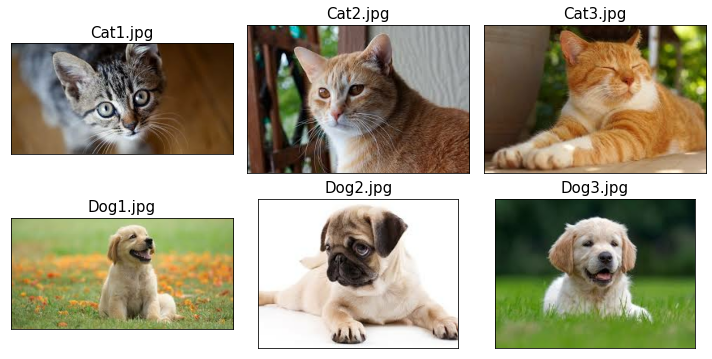

In [9]:
import os
fig = plt.figure(figsize = (10, 5))
for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape:', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size = 15)
plt.tight_layout()
plt.show()

In [10]:
labels = [1 if 'Dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [11]:
ds_file_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))
for item in ds_file_labels:
    print(item[0].numpy(), item[1].numpy())

b'/home/waihlan/Pictures/Tensorflow course/cat_dog_images/Cat1.jpg' 0
b'/home/waihlan/Pictures/Tensorflow course/cat_dog_images/Cat2.jpg' 0
b'/home/waihlan/Pictures/Tensorflow course/cat_dog_images/Cat3.jpg' 0
b'/home/waihlan/Pictures/Tensorflow course/cat_dog_images/Dog1.jpg' 1
b'/home/waihlan/Pictures/Tensorflow course/cat_dog_images/Dog2.jpg' 1
b'/home/waihlan/Pictures/Tensorflow course/cat_dog_images/Dog3.jpg' 1


In [12]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    return image, label

In [13]:
img_width, img_height = 120, 80
ds_image_labels = ds_file_labels.map(load_and_preprocess)

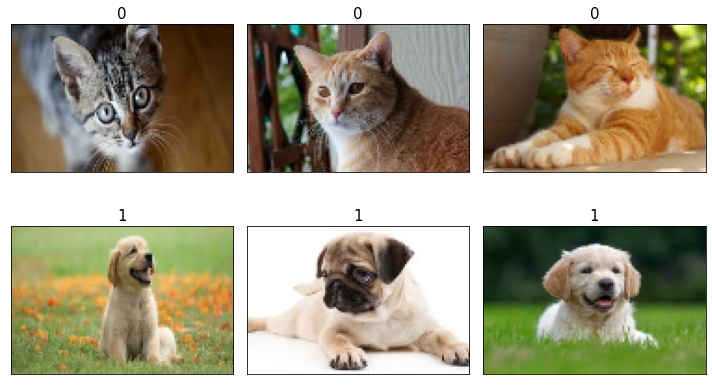

In [15]:
fig = plt.figure(figsize = (10, 6))
for i, example in enumerate(ds_image_labels):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), size = 15)
plt.tight_layout()
plt.show()

In [16]:
pip install tensorflow-datasets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.6 MB 17 kB/s eta 0:00:011
     |████████████████████████████████| 81 kB 36 kB/s eta 0:00:01
     |████████████████████████████████| 70 kB 42 kB/s eta 0:00:01
     |████████████████████████████████| 44 kB 60 kB/s eta 0:00:01
     |████████████████████████████████| 829 kB 90 kB/s eta 0:00:01
     |████████████████████████████████| 100 kB 108 kB/s ta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=493275 sha256=36913eb08bd702497b24ed36b085cba8eb3da66b3ee220a0f802a957c0c8dd76
  Stored in directory: /home/waihlan/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=23950 sha256=1d5844dd5cf954946010696ae49893142726c5d9ec45404daa8983f0d98a9ce5
  Stored in directory: /home/waihlan/.cache/pip/wheels/29/93/c6/762e359f8cb6a5b69c72235d798804cae523bbe41